In [9]:
from itertools import product
from copy import deepcopy

class NJ:
    
    def __init__(self, distances):
        self.distances = distances
        self.strings = {}
        self.last_key = None 
    
    def __getitem__(self, item):
        a, b = item
        if a == b:
            return 0
        try:
            dist = self.distances[a][b]
        except KeyError:
            dist = self.distances[b][a]
            self.distances[a][b] = dist
        finally:
            return dist   
    
    def find_min_metric(self):
        min_metric = float('inf')
        res = {}
        
        N = len(self.distances.keys())
        if N <= 2:
            return
        
        for el1, el2 in product(self.distances.keys(), self.distances.keys()):
            if el1 == el2:
                continue
                
            M1 = 0
            for el, dist in self.distances[el1].items():
                if el != el2:
                    M1 += dist
            M1 /= (N - 2)
        
            M2 = 0
            for el, dist in self.distances[el2].items():
                if el != el1:
                    M2 += dist
            M2 /= (N - 2)
            
            D = self[el1, el2]
            
            metric = D - M1 - M2
            if metric < min_metric:
                min_metric = metric
                res = {
                    'a': el1,
                    'b': el2,
                    'D': D,
                    'Ma': M1,
                    'Mb': M2
                }
        return res
    
    def unify(self, a, b, D, Ma, Mb):
        new = (a, b)
        new_dist = {}
        
        for el in self.distances.keys():
            if el in (a, b):
                continue
            new_dist[el] = 0.5 * (self[b, el] + self[el, a] - D)
            
            if a in self.distances[el].keys():
                self.distances[el].pop(a)
            if b in self.distances[el].keys():
                self.distances[el].pop(b)
        self.distances[new] = new_dist
                
        for n in new:
            if n in self.distances.keys():
                self.distances.pop(n)
            
        dist_a = round(0.5 * (D + Ma - Mb), 2)
        dist_b = round(0.5 * (D + Mb - Ma), 2)
        
        self.strings[new] = self.newick_string(a, b, dist_a, dist_b)
        self.last_key = new
    
    def newick_string(self, a, b, dist_a, dist_b):
        if len(a) == 1 and len(b) == 1:
            s = '{}:{},{}:{}'.format(a, dist_a, b, dist_b)
        elif len(a) > 1 and len(b) == 1:
            s = '({}):{},{}:{}'.format(self.strings[a], dist_a, b, dist_b)
        elif len(a) == 1 and len(b) > 1:
            s = '{}:{},({}):{}'.format(a, dist_a, self.strings[b], dist_b)
        else:
            s = '({}):{},({}):{}'.format(self.strings[a], dist_a, self.strings[b], dist_b)
        return s
            
    def brrr(self):
        while self.find_min_metric():
            self.unify(**self.find_min_metric())
        
        # manually concatenate last 2 nodes, i,e, root the tree
        a, b = self.distances.keys()
        D = self[a, b]
        dist_a = dist_b = D / 2  # Ma = Mb = 0
        
        return '(' + self.newick_string(a, b, dist_a, dist_b) + ')'     

## Тесты

In [10]:
test1 = {
    'A': { 'B': 16, 'C': 16, 'D': 10 },
    'B': { 'C': 8, 'D': 8},
    'C': { 'D': 4},
    'D': {}
}
NJ1 = NJ(deepcopy(test1))
print(NJ1.brrr())

(A:5.25,(B:5.5,(C:3.5,D:0.5):0.5):5.25)


In [11]:
test2 = {
    'A': {'B': 5, 'C':  4, 'D': 7, 'E': 6, 'F': 8},
    'B': {'C': 7, 'D': 10, 'E': 9, 'F': 11},
    'C': {'D': 7, 'E': 6, 'F': 8},
    'D': {'E': 5, 'F': 9},
    'E': {'F': 8},
    'F': {}
}
NJ2 = NJ(deepcopy(test2))
print(NJ2.brrr())

(F:2.5,((C:2.0,(A:1.0,B:4.0):1.0):1.0,(D:3.0,E:2.0):1.0):2.5)


In [12]:
# пример с Wiki
test3 = {
    'a': {'b': 5, 'c': 9, 'd': 9, 'e':8},
    'b': {'c': 10, 'd': 10, 'e': 9},
    'c': {'d': 8, 'e': 7},
    'd': {'e': 3},
    'e': {}
}
NJ3 = NJ(deepcopy(test3))
print(NJ3.brrr())

(c:2.0,((d:2.0,e:1.0):2.0,(a:2.0,b:3.0):3.0):2.0)


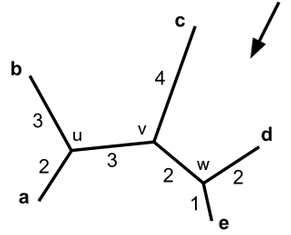

Сошлось! (по модулю того, что для записи у меня в середину последнего ребра вешается корень)

## Проверка работы звёздочек...

In [4]:
class Test:
    def __init__(self):
        pass
    
    def test_kwargs(self):
        tmp = {'b': 1, 'c': 3, 'a': 2}
        self.funk_with_kwargs(**tmp)
    
    def funk_with_kwargs(self, a, b, c):
        print(a, b, c)

In [5]:
x = Test()
x.test_kwargs()

2 1 3


In [13]:
x = {}
if x:
    print('hehey')